Problem Statement: Analysis on how extracurricular activities affect student marks using linear regression

In [1]:
import pandas as pd 

In [2]:
file_path = 'student.csv'
student_data = pd.read_csv(file_path)
student_data.head()

,Reg_no,Gender,Degree,Tenth_marks,Eleventh_marks,Twelfth_marks,Income,Family_size,Objective,Study_pattern,Time_spent_pattern,Extra_curricular_activity,Paused_resumed
0,st101,Female,II PU/12th,90.8,91.1,93.6,"Upper middle income ( 1,00,000 - 2,00,000)",3,"Yes, clear and specific.",4-6 days/week,3-4 hrs,Sports and Physical Activities,Paused and resumed due to academics.
1,st102,Male,II PU/12th,88.5,93,94.3,"Upper middle income ( 1,00,000 - 2,00,000)",4,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Completely stopped because of academics.
2,st103,Female,II PU/12th,98.8,97.3,97.8,"Middle income (50,000 - 1,00, 000)",4,"Yes, clear and specific.",Everyday,2-3 hrs,Others,Paused and resumed due to academics.
3,st104,Female,II PU/12th,90.8,96,92.0,"High income ( > 2,00,000)",above 5,"Yes, clear and specific.",4-6 days/week,2-3 hrs,Arts and Culture,Paused and resumed due to academics.
4,st105,Male,II PU/12th,90.6,91,96.0,"Upper middle income ( 1,00,000 - 2,00,000)",5,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Paused and resumed due to academics.


In [3]:
#display the number of records in each column for data cleaning and analysis
columns = ['Gender', 'Degree', 'Income', 'Family_size ', 'Objective', 'Study_pattern', 'Time_spent_pattern', 'Extra_curricular_activity', 'Paused_resumed']

for column in columns:
    print(student_data[column].value_counts())
    print()


Gender
Female    39
Male      39
Name: count, dtype: int64

Degree
II PU/12th    78
Name: count, dtype: int64

Income
High income ( >  2,00,000)                    43
Upper middle income ( 1,00,000 - 2,00,000)    17
Middle income (50,000 - 1,00, 000)            14
Lower middle income ( 25000 - 50,000 )         3
Low income ( < 10000)                          1
Name: count, dtype: int64

Family_size 
4          39
3          18
5          14
above 5     7
Name: count, dtype: int64

Objective
Yes, clear and specific.    50
Not specific enough.        27
No clarity at all.           1
Name: count, dtype: int64

Study_pattern
4-6 days/week    36
2-3 days/week    20
Everyday         17
1 day/week        3
Never             2
Name: count, dtype: int64

Time_spent_pattern
2-3 hrs        31
3-4 hrs        17
1-2 hrs        14
0-1 hr          7
4-5 hrs         6
above 5 hrs     3
Name: count, dtype: int64

Extra_curricular_activity
Sports and Physical Activities    28
Fitness and wellness      

In [4]:
student_data_cleaned = student_data.copy()


In [5]:
#dropping degree column due to null values
student_data_cleaned.drop('Degree', axis=1, inplace=True)


In [6]:
#marks column for all three scores
marks_columns = ['Tenth_marks', 'Eleventh_marks', 'Twelfth_marks']
for column in marks_columns:
    student_data_cleaned[column] = pd.to_numeric(student_data_cleaned[column], errors='coerce')


In [7]:
#cleaned data
student_data_cleaned.to_csv('cleaned.csv', index=False)

student_data_cleaned.head()


,Reg_no,Gender,Tenth_marks,Eleventh_marks,Twelfth_marks,Income,Family_size,Objective,Study_pattern,Time_spent_pattern,Extra_curricular_activity,Paused_resumed
0,st101,Female,90.8,91.1,93.6,"Upper middle income ( 1,00,000 - 2,00,000)",3,"Yes, clear and specific.",4-6 days/week,3-4 hrs,Sports and Physical Activities,Paused and resumed due to academics.
1,st102,Male,88.5,93.0,94.3,"Upper middle income ( 1,00,000 - 2,00,000)",4,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Completely stopped because of academics.
2,st103,Female,98.8,97.3,97.8,"Middle income (50,000 - 1,00, 000)",4,"Yes, clear and specific.",Everyday,2-3 hrs,Others,Paused and resumed due to academics.
3,st104,Female,90.8,96.0,92.0,"High income ( > 2,00,000)",above 5,"Yes, clear and specific.",4-6 days/week,2-3 hrs,Arts and Culture,Paused and resumed due to academics.
4,st105,Male,90.6,91.0,96.0,"Upper middle income ( 1,00,000 - 2,00,000)",5,Not specific enough.,2-3 days/week,1-2 hrs,Sports and Physical Activities,Paused and resumed due to academics.


In [8]:
print(student_data_cleaned['Extra_curricular_activity'])
new = student_data_cleaned['Extra_curricular_activity']

0      Sports and Physical Activities
1      Sports and Physical Activities
2                              Others
3                    Arts and Culture
4      Sports and Physical Activities
                    ...              
173                               NaN
174                               NaN
175                               NaN
176                               NaN
177                               NaN
Name: Extra_curricular_activity, Length: 178, dtype: object


In [9]:
data = student_data_cleaned
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(data['Extra_curricular_activity'])
import seaborn as sns
print(data['Extra_curricular_activity'])

0      Sports and Physical Activities
1      Sports and Physical Activities
2                              Others
3                    Arts and Culture
4      Sports and Physical Activities
                    ...              
173                               NaN
174                               NaN
175                               NaN
176                               NaN
177                               NaN
Name: Extra_curricular_activity, Length: 178, dtype: object
0      Sports and Physical Activities
1      Sports and Physical Activities
2                              Others
3                    Arts and Culture
4      Sports and Physical Activities
                    ...              
173                               NaN
174                               NaN
175                               NaN
176                               NaN
177                               NaN
Name: Extra_curricular_activity, Length: 178, dtype: object


In [10]:
#scatter plot to show the relationship between extracurricular activiteies and academic performance

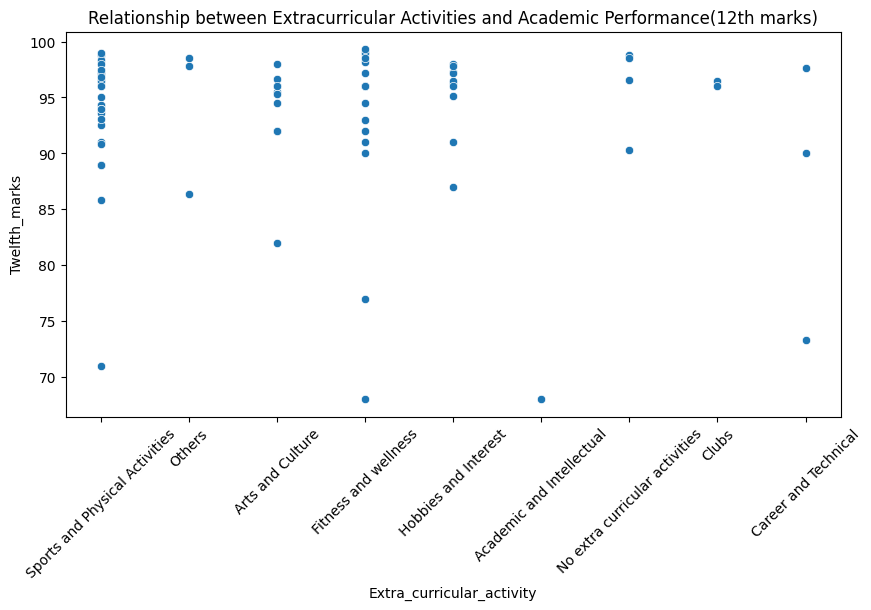

In [11]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Extra_curricular_activity', y='Twelfth_marks', data=student_data)
plt.title('Relationship between Extracurricular Activities and Academic Performance(12th marks)')
plt.xticks(rotation=45)
plt.show()

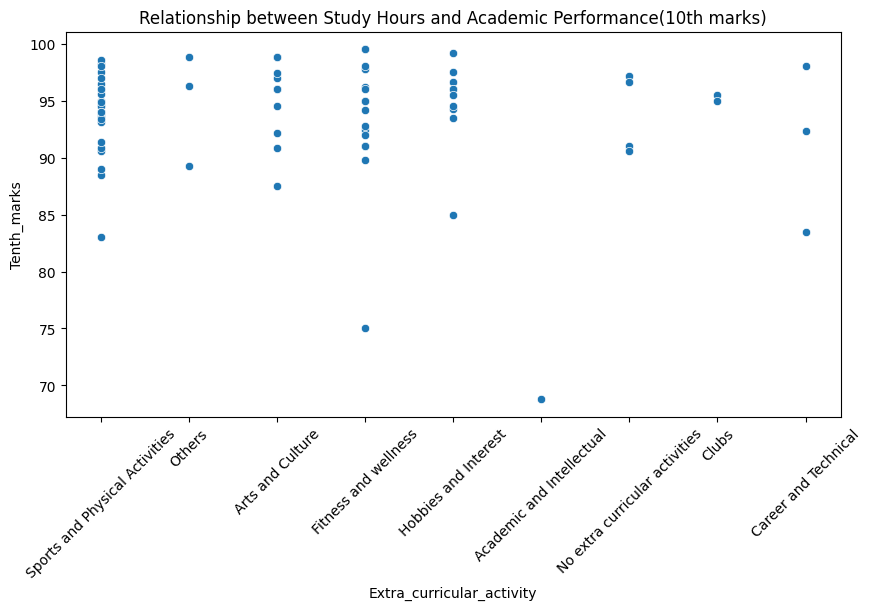

In [12]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Extra_curricular_activity', y='Tenth_marks', data=student_data)
plt.title('Relationship between Study Hours and Academic Performance(10th marks)')
plt.xticks(rotation=45)
plt.show()

In [13]:
#box plot to show relationship between extracurricular activities and academic performance

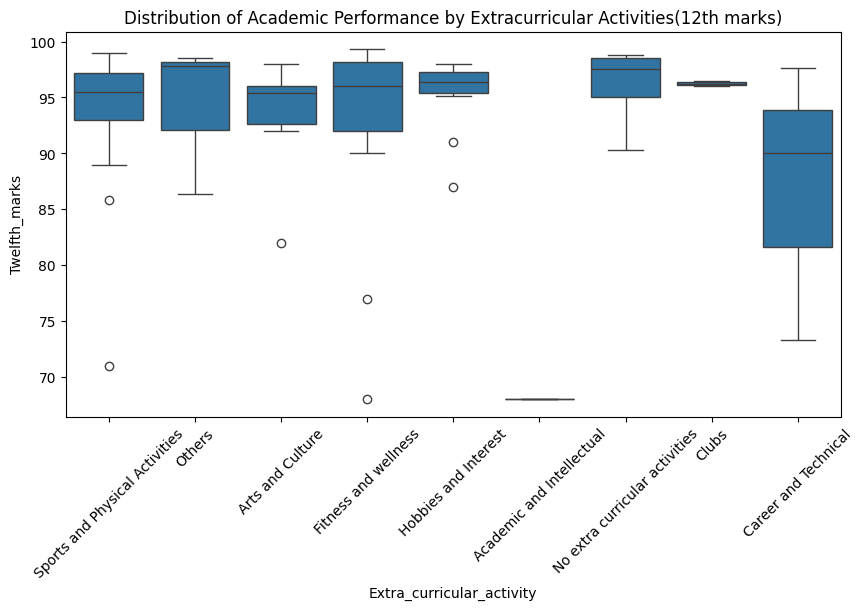

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Extra_curricular_activity', y='Twelfth_marks', data=student_data)
plt.title('Distribution of Academic Performance by Extracurricular Activities(12th marks)')
plt.xticks(rotation=45)
plt.show()


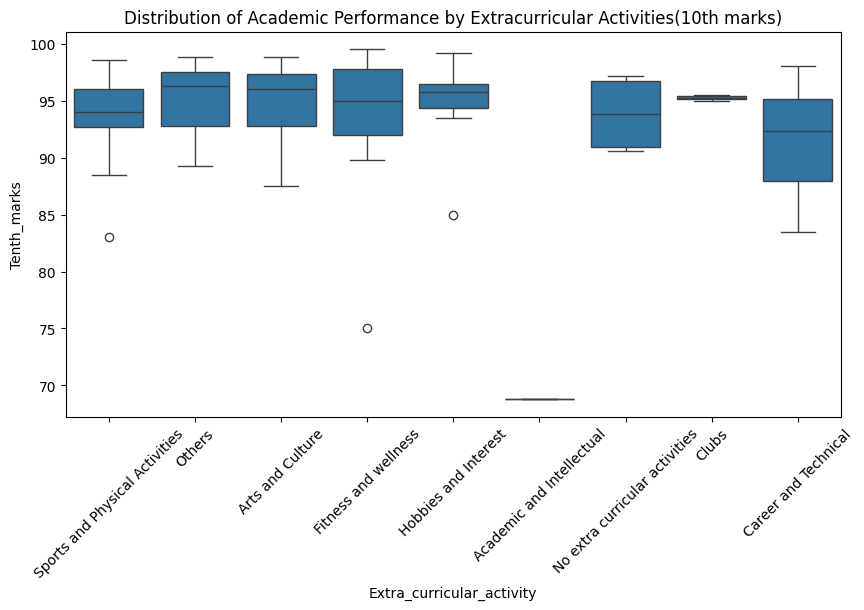

In [15]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Extra_curricular_activity', y='Tenth_marks', data=student_data)
plt.title('Distribution of Academic Performance by Extracurricular Activities(10th marks)')
plt.xticks(rotation=45)
plt.show()


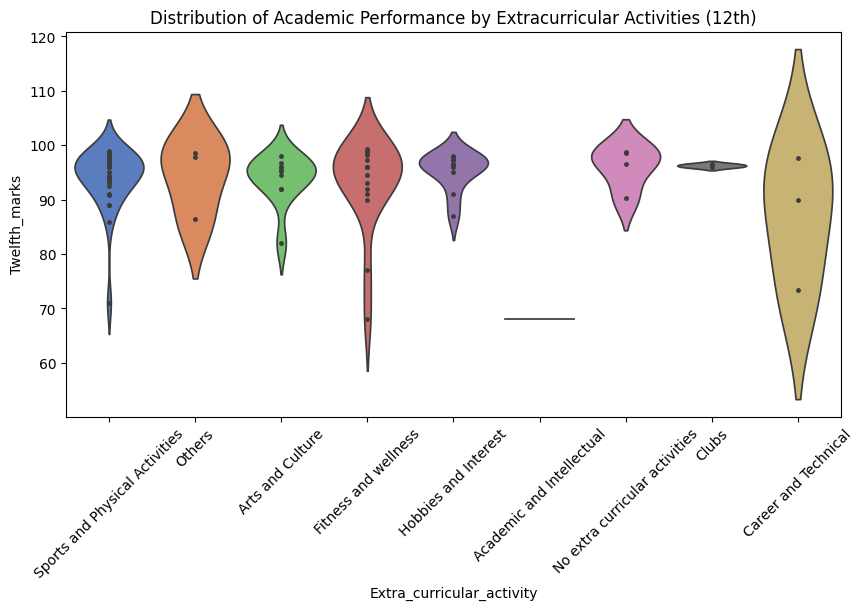

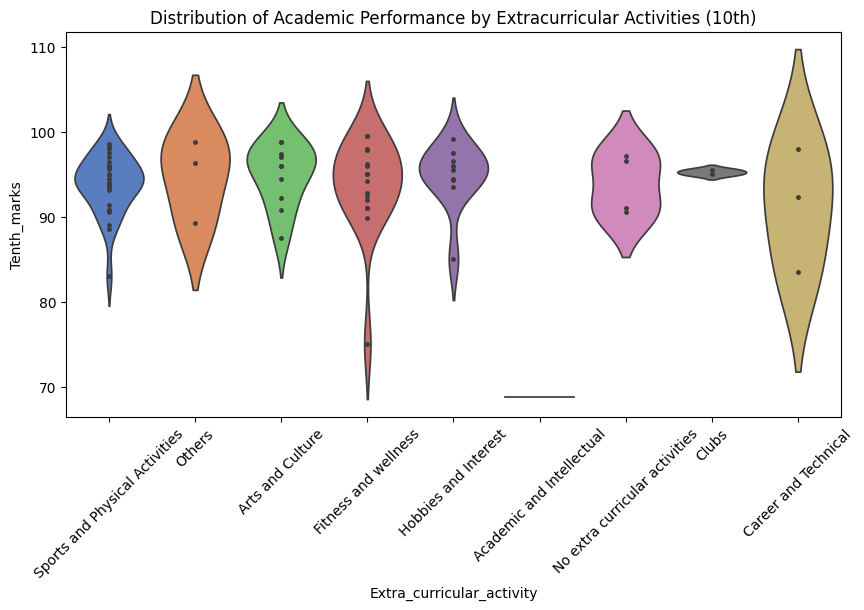

In [16]:
#Violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x='Extra_curricular_activity', y='Twelfth_marks', data=student_data, inner="point", density_norm="width", palette="muted", hue='Extra_curricular_activity', legend=False)
plt.title('Distribution of Academic Performance by Extracurricular Activities (12th)')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(10, 5))
sns.violinplot(x='Extra_curricular_activity', y='Tenth_marks', data=student_data, inner="point", density_norm="width", palette="muted", hue='Extra_curricular_activity', legend=False)
plt.title('Distribution of Academic Performance by Extracurricular Activities (10th)')
plt.xticks(rotation=45)
plt.show()



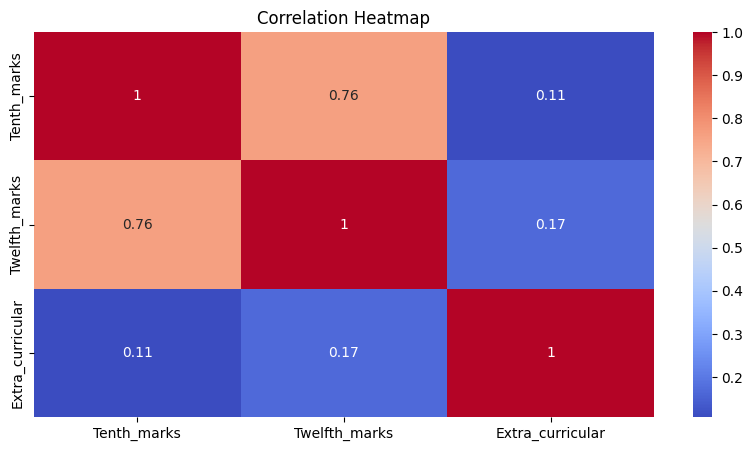

In [17]:
#correlation between student's performance and extracurricular activities
data = student_data_cleaned
data['Extra_curricular'] = data['Extra_curricular_activity'].astype('category').cat.codes
# Select only relevant numerical columns for correlation matrix
correlation_data = data[['Tenth_marks', 'Twelfth_marks', 'Extra_curricular']]
correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
#Using the ols model for linear regression summary
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
data['Study_pattern'] = data['Study_pattern'].astype('category').cat.codes
model = smf.ols('Twelfth_marks ~ Extra_curricular + Study_pattern + Tenth_marks', data=data).fit()

print("\nLinear Regression Summary:\n", model.summary())


Linear Regression Summary:
                             OLS Regression Results                            
Dep. Variable:          Twelfth_marks   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     34.98
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           3.47e-14
Time:                        18:20:50   Log-Likelihood:                -225.30
No. Observations:                  78   AIC:                             458.6
Df Residuals:                      74   BIC:                             468.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept  

In [19]:
#mean academic performance based on extracurricular activity in 12th grade
grouped_data = data.groupby('Extra_curricular_activity')['Twelfth_marks'].mean()
print("\nMean Academic Performance by Activity Category:\n", grouped_data)



Mean Academic Performance by Activity Category:
 Extra_curricular_activity
Academic and Intellectual         68.000000
Arts and Culture                  93.797000
Career and Technical              86.990000
Clubs                             96.250000
Fitness and wellness              92.984118
Hobbies and Interest              95.229000
No extra curricular activities    96.057500
Others                            94.233333
Sports and Physical Activities    93.930000
Name: Twelfth_marks, dtype: float64


In [20]:
#mean academic performance based on extracurricular activity in 10th grade
grouped_data = data.groupby('Extra_curricular_activity')['Tenth_marks'].mean()
print("\nMean Academic Performance by Activity Category:\n", grouped_data)


Mean Academic Performance by Activity Category:
 Extra_curricular_activity
Academic and Intellectual         68.800000
Arts and Culture                  94.900000
Career and Technical              91.276667
Clubs                             95.250000
Fitness and wellness              93.708235
Hobbies and Interest              94.812000
No extra curricular activities    93.840000
Others                            94.800000
Sports and Physical Activities    93.777857
Name: Tenth_marks, dtype: float64


ANALYSIS

Students participating in clubs, arts and culture, hobbies and interests, and other unspecified activities tend to achieve the
highest academic performance, with mean Tenth marks consistently above 94.0 and mean 12th marks above 95.2. This suggests that engagement
in these types of extracurricular activities might positively correlate with better academic outcomes whereas academic and intellectual 
extracurriculars show a surprisingly lower academic performance. In conclusion students should be encouraged to partake in more non academic extra curriculars for better performances

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Drop missing values
student_data = student_data.dropna()

In [105]:
print(student_data.isnull().sum())

Reg_no                       0
Gender                       0
Tenth_marks                  0
Eleventh_marks               0
Twelfth_marks                0
Income                       0
Family_size                  0
Objective                    0
Study_pattern                0
Time_spent_pattern           0
Extra_curricular_activity    0
Paused_resumed               0
Extra_curricular             0
dtype: int64


In [157]:
X = student_data[['Extra_curricular_activity']]
y = student_data['Twelfth_marks']

#  Aplly one-hot encoding to convert non numeric columns
X = pd.get_dummies(X, columns=['Extra_curricular_activity'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [158]:
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [159]:
# Predict on the test set
y_pred = model.predict(X_test)

In [160]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Absolute Error: 5.876826923076924
R-squared: -0.725591949206507


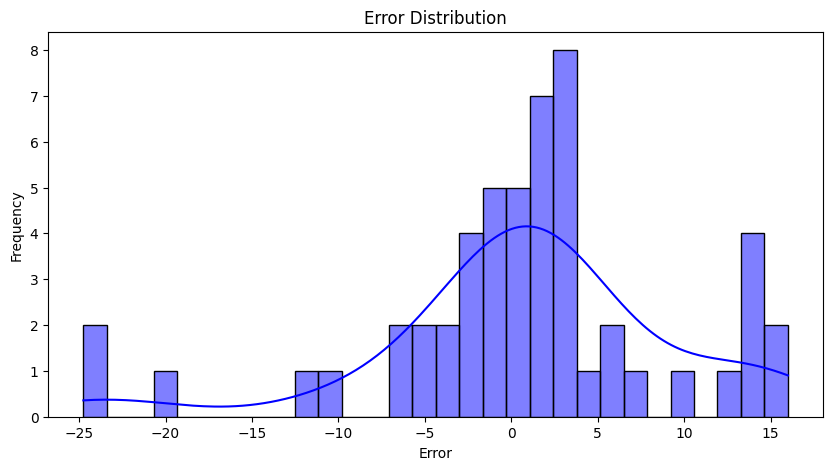

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

errors = y_test - y_pred

plt.figure(figsize=(10, 5))
sns.histplot(errors, bins=30, kde=True, color='blue')
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.show()


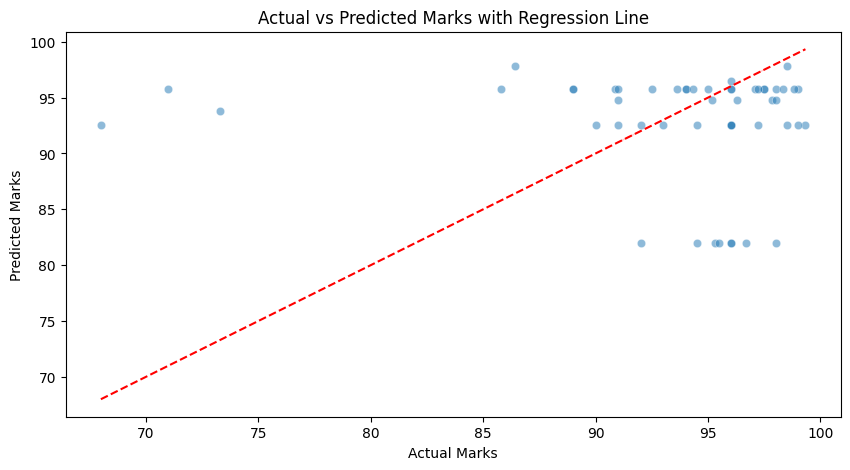

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--')
plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks with Regression Line")
plt.show()


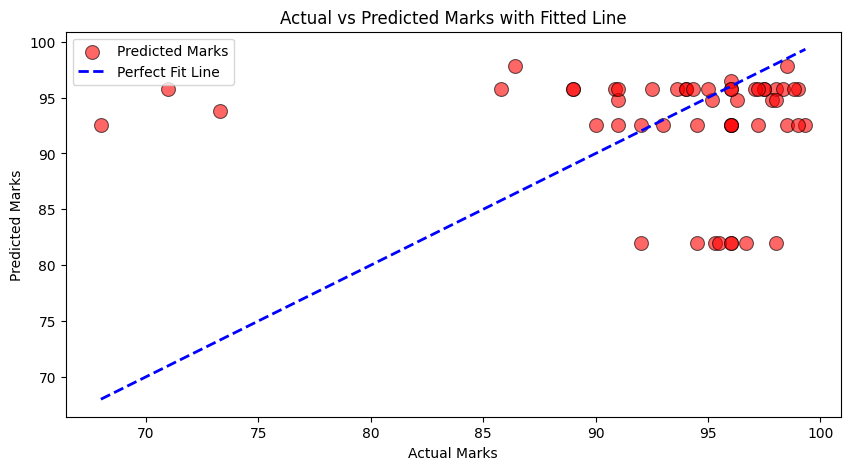

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Scatter plot of actual vs. predicted values
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolors='k', s=100, color='red', label='Predicted Marks')

# Adding a line for reference (perfect fit line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', lw=2, label='Perfect Fit Line')

plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Actual vs Predicted Marks with Fitted Line")
plt.legend()
plt.show()


The Above Machine Learning Model predicts students twelfth marks based on their extracurricular activities with a mean absolute error of 5.876826923076924 using linear regression 